In [ ]:
#importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing library related to logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 1. Data Exploration & 2. Data Preprocessing:

In [14]:
#loading train and test dataset
df_train =pd.read_csv("Titanic_train.csv")
df_test =pd.read_csv("Titanic_test.csv")

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#removing coloumns which is not important for logistic regression 
df_train = df_train.drop(columns=['PassengerId', 'Name','Ticket', 'Cabin' ], axis = 1)

In [17]:
df_test = df_test.drop(columns =['PassengerId', 'Name','Ticket', 'Cabin' ], axis = 1)

In [19]:
df_train.head(2)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [20]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [22]:
#handling missing value 
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [23]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
mode =df_train['Embarked'].mode()[0]
mode

'S'

In [34]:
df_train['Embarked'] = df_train['Embarked'].fillna(mode)

In [27]:
median_value = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(median_value)

In [35]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [38]:
median_value = df_test['Age'].median()
df_test['Age'] = df_test['Age'].fillna(median_value)

In [39]:
df_test = df_test.dropna(subset=['Fare'])


In [40]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
#Chech data type:
df_test.dtypes, df_train.dtypes

(Pclass        int64
 Sex          object
 Age         float64
 SibSp         int64
 Parch         int64
 Fare        float64
 Embarked     object
 dtype: object,
 Survived      int64
 Pclass        int64
 Sex          object
 Age         float64
 SibSp         int64
 Parch         int64
 Fare        float64
 Embarked     object
 dtype: object)

In [44]:
#value count for categorical value 
df_train['Embarked'].value_counts(), df_test['Embarked'].value_counts()

(Embarked
 S    646
 C    168
 Q     77
 Name: count, dtype: int64,
 Embarked
 S    269
 C    102
 Q     46
 Name: count, dtype: int64)

In [45]:
#methametical summary of train and test dataset
df_train.describe(), df_test.describe()

(         Survived      Pclass         Age       SibSp       Parch        Fare
 count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
 mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
 std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200,
            Pclass         Age       SibSp       Parch        Fare
 count  417.000000  417.000000  417.000000  417.000000  417.000000
 mean     2.263789   29.525180    0.448441    0.393285   35.627188
 std      0.842077   12.628258    0.897568    0.982419   55.907576
 min      1.000000  

In [47]:
# check shape of train and test dataset
df_train.shape, df_test.shape

((891, 8), (417, 7))

In [50]:
#Encode\ing categorical variables
#df_train = pd.get_dummies(df_train, columns=['Sex'])
#df_test = pd.get_dummies(df_test, columns = ['Sex'])

In [51]:
df_train.head(2), df_test.head(2)

(   Survived  Pclass   Age  SibSp  Parch     Fare Embarked  Sex_female  \
 0         0       3  22.0      1      0   7.2500        S       False   
 1         1       1  38.0      1      0  71.2833        C        True   
 
    Sex_male  
 0      True  
 1     False  ,
    Pclass     Sex   Age  SibSp  Parch    Fare Embarked
 0       3    male  34.5      0      0  7.8292        Q
 1       3  female  47.0      1      0  7.0000        S)

In [52]:
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns = ['Embarked'])

In [53]:
df_train.head(2), df_test.head(2)

(   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
 0         0       3  22.0      1      0   7.2500       False      True   
 1         1       1  38.0      1      0  71.2833        True     False   
 
    Embarked_C  Embarked_Q  Embarked_S  
 0       False       False        True  
 1        True       False       False  ,
    Pclass     Sex   Age  SibSp  Parch    Fare  Embarked_C  Embarked_Q  \
 0       3    male  34.5      0      0  7.8292       False        True   
 1       3  female  47.0      1      0  7.0000       False       False   
 
    Embarked_S  
 0       False  
 1        True  )

In [58]:
#df_train = df_train.drop(['Sex_female', 'Embarked_C'], axis=1)
#df_test = df_test.drop(['Sex_female', 'Embarked_C'], axis=1)


In [59]:
df_train.head(2), df_test.head(2)

(   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
 0         0       3  22.0      1      0   7.2500      True       False   
 1         1       1  38.0      1      0  71.2833     False       False   
 
    Embarked_S  
 0        True  
 1       False  ,
    Pclass     Sex   Age  SibSp  Parch    Fare  Embarked_C  Embarked_Q  \
 0       3    male  34.5      0      0  7.8292       False        True   
 1       3  female  47.0      1      0  7.0000       False       False   
 
    Embarked_S  
 0       False  
 1        True  )

In [60]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,False,True,False
1,3,female,47.0,1,0,7.0000,False,False,True


In [61]:
df_test = pd.get_dummies(df_test, columns = ['Sex'])

In [64]:
df_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34.5,0,0,7.8292,True,False,True
1,3,47.0,1,0,7.0000,False,True,False


In [63]:
df_test = df_test.drop(['Sex_female', 'Embarked_C'], axis=1)


In [65]:
# 0 and 1 mapping  for test:
df_test['Embarked_Q'] = df_test['Embarked_Q'].map({True: 0, False: 1})
df_test['Embarked_S'] = df_test['Embarked_S'].map({True: 0, False: 1})
df_test['Sex_male'] = df_test['Sex_male'].map({True: 0, False: 1})
# 0 and 1 mapping  for train:

df_train['Embarked_Q'] = df_train['Embarked_Q'].map({True: 0, False: 1})
df_train['Embarked_S'] = df_train['Embarked_S'].map({True: 0, False: 1})
df_train['Sex_male'] = df_train['Sex_male'].map({True: 0, False: 1})

In [67]:
df_train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0
1,1,1,38.0,1,0,71.2833,1,1,1


In [68]:
df_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34.5,0,0,7.8292,0,1,0
1,3,47.0,1,0,7.0000,1,0,1


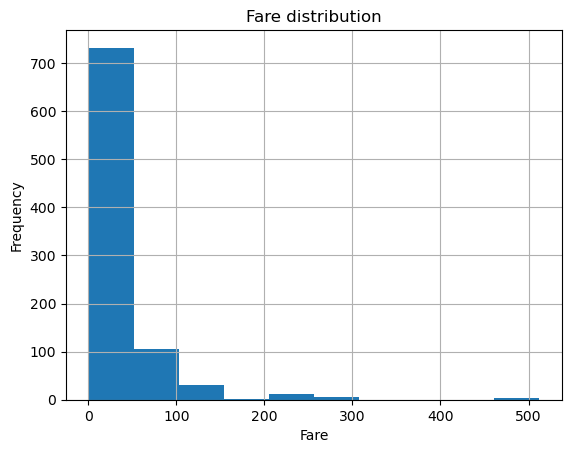

In [69]:
#histogram 
df_train['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare distribution')
plt.show()


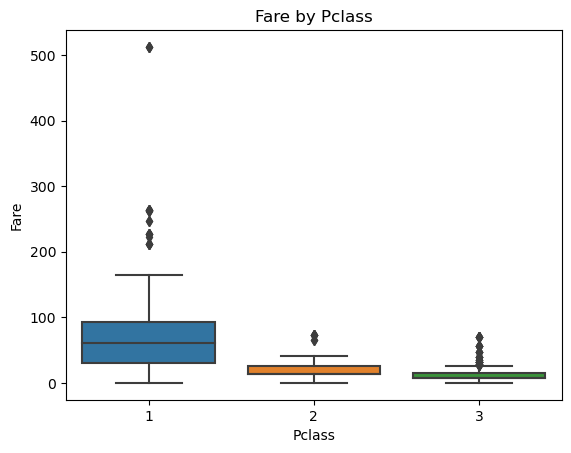

In [70]:
#box plot
# Box Plot
sns.boxplot(x ='Pclass', y='Fare', data = df_train)
plt.title('Fare by Pclass')
plt.show()

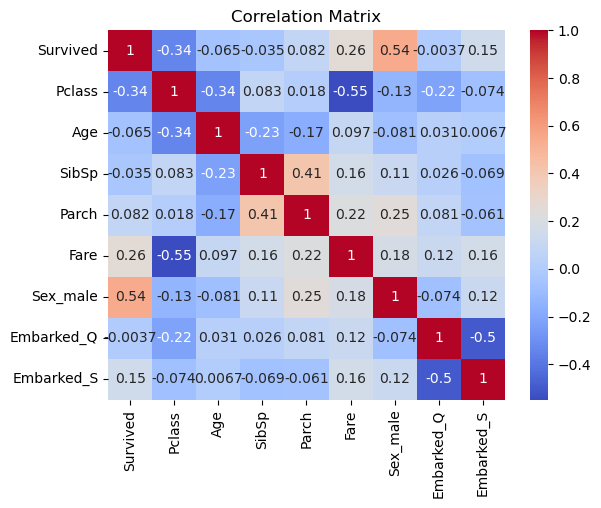

In [72]:
#correlation plot 
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

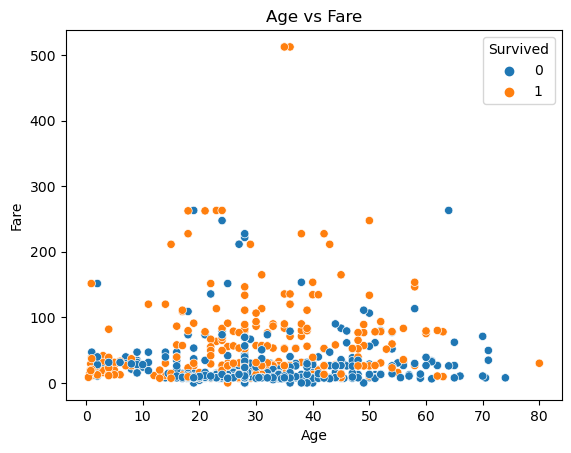

In [74]:
# Scatter Plot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)
plt.title('Age vs Fare')
plt.show()

In [75]:
#form above all plot we can say that outlier is present near 500 value.


# 3. Model Building:

In [76]:
# Dividing our data into independent and target variables 
X = df_train.iloc[:,1:]
Y = df_train.iloc[:,0]

In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter=200)
classifier.fit(X,Y)

In [78]:
Y_predict =classifier.predict(X)
Y_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [79]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [80]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [81]:
#here my model is trained 

# 4. Model Evaluation:

In [82]:
#confusion matrix
confusion_matrix = confusion_matrix(Y,Y_predict)
print (confusion_matrix)

[[473  76]
 [102 240]]


In [83]:
#Classification Report 
print(classification_report(Y,Y_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



Text(0, 0.5, 'True Positive Rate')

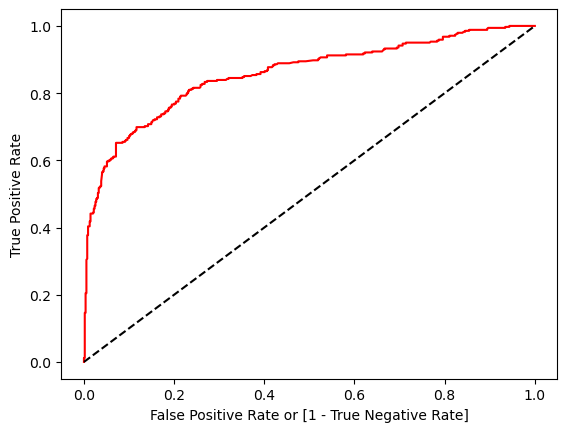

In [84]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, Y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [85]:
auc

0.7816604352411083

In [ ]:
#AUC (Area Under the Curve) of your ROC (Receiver Operating Characteristic) curve is 78%, this suggests that your model has a reasonable ability to distinguish between the positive and negative classes. 

# 5. Interpretation

In [86]:
#Here we are going to apply this train model concept to test dataset to predict y_test

In [87]:
X_test = df_test.iloc[:, 0:]

In [88]:
#There was some issue with indexing so i set my x test indexing same as x train data
X_test = X_test.reindex(columns=X.columns)

In [89]:
Y_predict = classifier.predict(X_test)
Y_predict


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [90]:
df_Y_predict = pd.DataFrame(Y_predict, columns=['Y_predict'])
df_Y_predict

,Y_predict
0,0
1,0
2,0
3,0
4,1
...,...
412,0
413,1
414,0
415,0


# 6. Deployment with Streamlit:

In [92]:
!pip install streamlit

In [102]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load the trained model from the pickle file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Streamlit app title
st.title("Logistic Regression Model Deployment")

# User inputs for the model
Pclass = st.number_input("Pclass", min_value=1, max_value=3)
Age = st.number_input("Age", min_value=0, max_value=100)
SibSp = st.number_input("SibSp", min_value=0, max_value=10)
Parch = st.number_input("Parch", min_value=0, max_value=10)
Fare = st.number_input("Fare", min_value=0.0, max_value=500.0)
Embarked_Q = st.selectbox("Embarked_Q", [0, 1])
Embarked_S = st.selectbox("Embarked_S", [0, 1])
Sex_male = st.selectbox("Sex_male", [0, 1])

# Create an array for prediction
input_data = np.array([[Pclass, Age, SibSp, Parch, Fare, Embarked_Q, Embarked_S, Sex_male]])

# Button to make prediction
if st.button("Predict"):
    prediction = model.predict(input_data)
    st.write(f"Predicted Survived: {prediction[0]}")


Writing app.py


In [ ]:
!streamlit run app.py
